In [1]:
import pandas as pd

In [2]:
real_estate_df = pd.read_csv('realtor-data.csv')

In [3]:
real_estate_df.shape

(2226382, 12)

In [4]:
real_estate_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
real_estate_df['city_encoded'] = real_estate_df['city'].astype('category').cat.codes
real_estate_df['state_encoded'] = real_estate_df['state'].astype('category').cat.codes

In [6]:
real_estate_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,city_encoded,state_encoded
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,92,41
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,92,41
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,8788,41
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN,14314,41
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN,10936,41


In [15]:
features = ['price', 'bed', 'bath', 'acre_lot', 'street', 'city_encoded', 'state_encoded', 'house_size']
df = real_estate_df[features]

df = df.dropna()
df.shape

(1356691, 8)

## Visualization

In [18]:
df_visuals = real_estate_df[['price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'house_size']]
df_visuals = df_visuals.dropna()

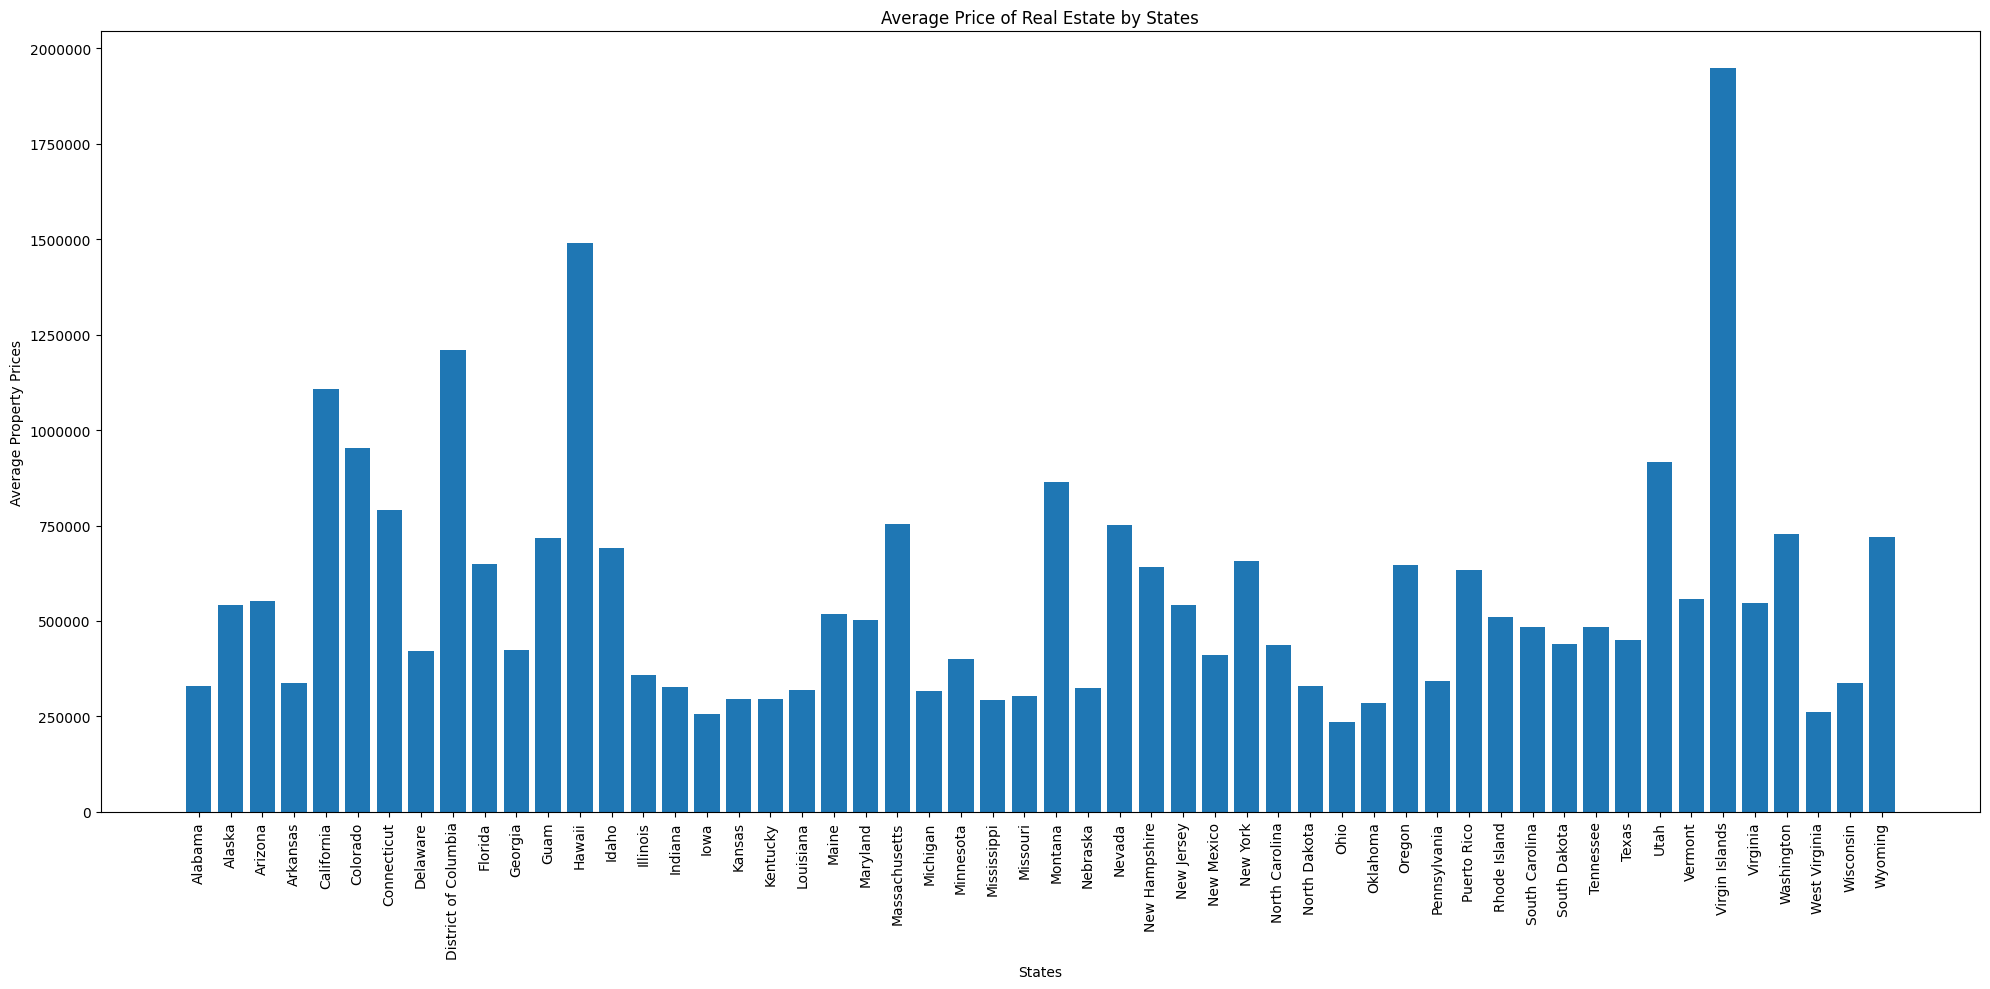

In [19]:
import matplotlib.pyplot as plt

avg_prices = df_visuals.groupby('state')['price'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.bar(avg_prices['state'], avg_prices['price'])
plt.xlabel("States")
plt.ylabel("Average Property Prices")
plt.title("Average Price of Real Estate by States")
plt.xticks(rotation=90)

plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()

In [26]:
df_visuals['state'].value_counts(ascending=True).head(10)

state
Guam               116
Virgin Islands     122
Alaska             810
Vermont           1262
New Hampshire     1734
Wyoming           1755
Puerto Rico       1775
South Dakota      2027
Maine             2267
North Dakota      2394
Name: count, dtype: int64

Since we do not have enough data to find average price in some states, the graph shows unfairly low and unfairly high for some states.
So we remove states with a count less than 1,000 later in the preprocessing stage

In [29]:
import numpy as np

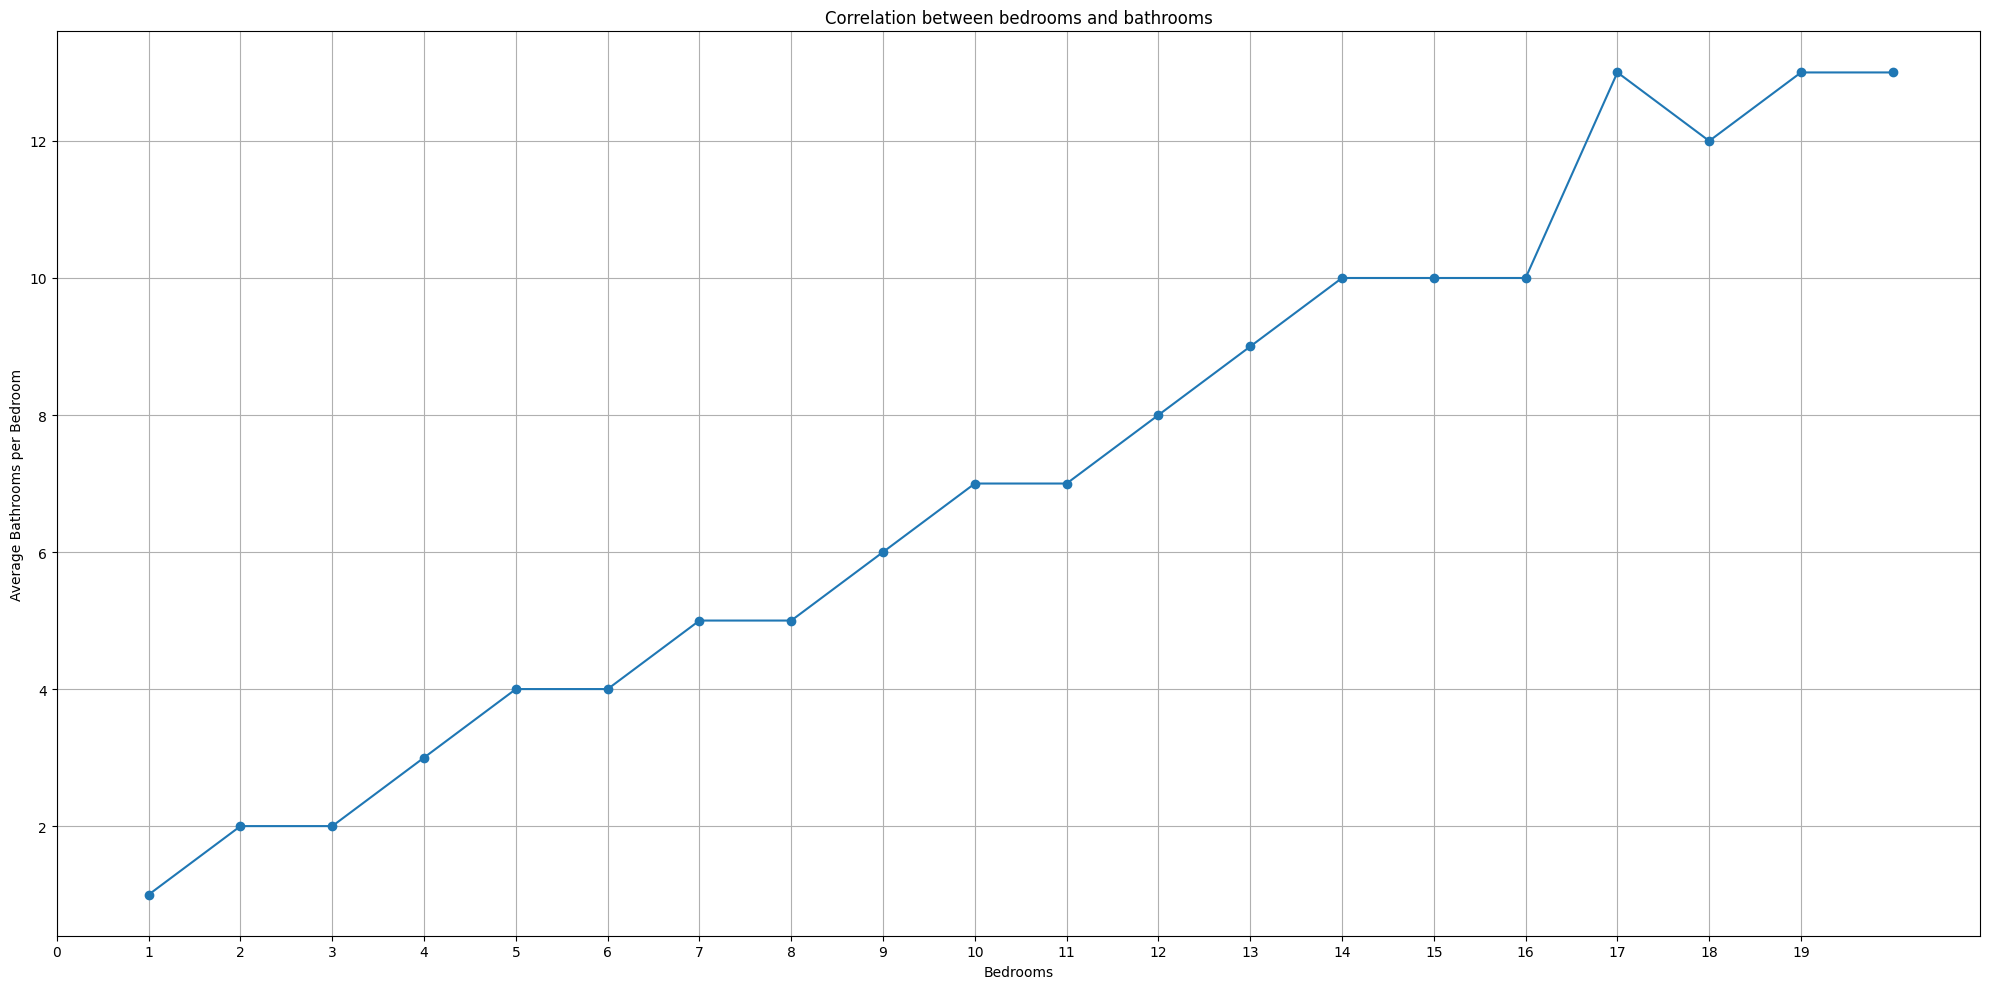

In [32]:
filtered_data = df_visuals[(df_visuals['bed'] <= 20)]
avg_bathrooms = filtered_data.groupby('bed')['bath'].mean().round().reset_index()

plt.figure(figsize=(20,10))
plt.plot(avg_bathrooms['bed'], avg_bathrooms['bath'], marker = 'o')
plt.xlabel('Bedrooms')
plt.ylabel('Average Bathrooms per Bedroom')
plt.title('Correlation between bedrooms and bathrooms')

plt.xticks(np.arange(0,20, step=1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
df_visuals['bed'].value_counts().head(20)

bed
3.0     623450
4.0     373151
2.0     191550
5.0     103225
6.0      26192
1.0      22857
7.0       6242
8.0       4366
9.0       1777
10.0       990
12.0       738
11.0       439
14.0       188
13.0       177
16.0       168
15.0       147
18.0        97
20.0        75
17.0        62
24.0        57
Name: count, dtype: int64

After 12 bedrooms we can notice the change in the pattern of the graph, this is where we can remove all the data after 12 bedrooms. So count less than 400 we shall remove.

In [33]:
df_visuals[df_visuals['bed'] <= 12]['acre_lot'].max()
# The maximum acre lot size after we reduce our dataset to only 12 bedrooms is 100,000
# This means automatically our dataset will now only have acre sizes from 0 to 100,000

100000.0

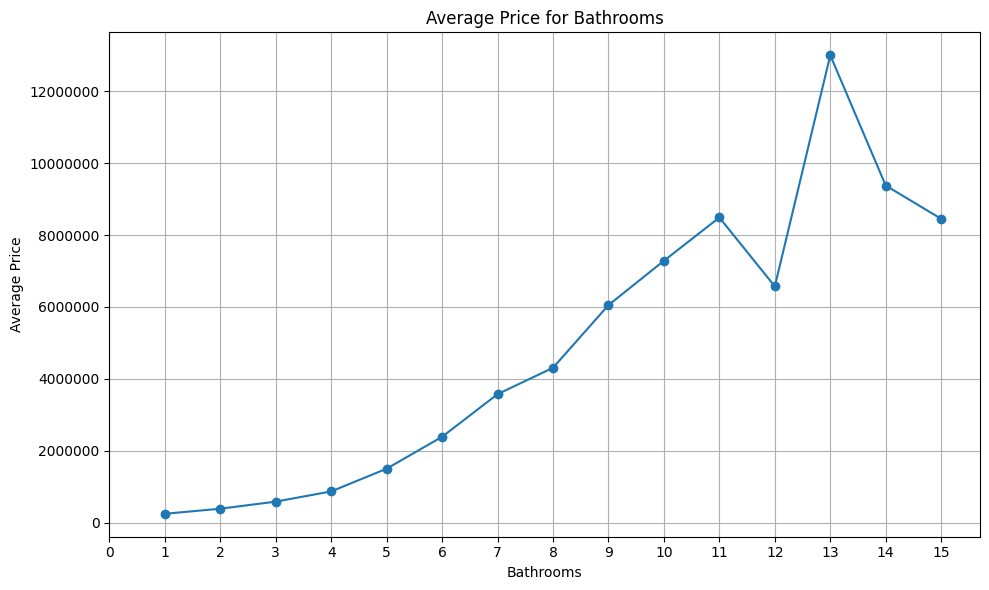

In [55]:
filtered_data_bath = df_visuals[(df_visuals['bath'] <= 15)]

avg_prices_bath_filtered = filtered_data_bath.groupby('bath')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(avg_prices_bath_filtered['bath'], avg_prices_bath_filtered['price'], marker='o')
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price for Bathrooms')
plt.grid(True)

plt.xticks(range(16))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

We notice that until 11 bathrooms the graph is normal. Hence, we only take data up to 11 bathrooms.

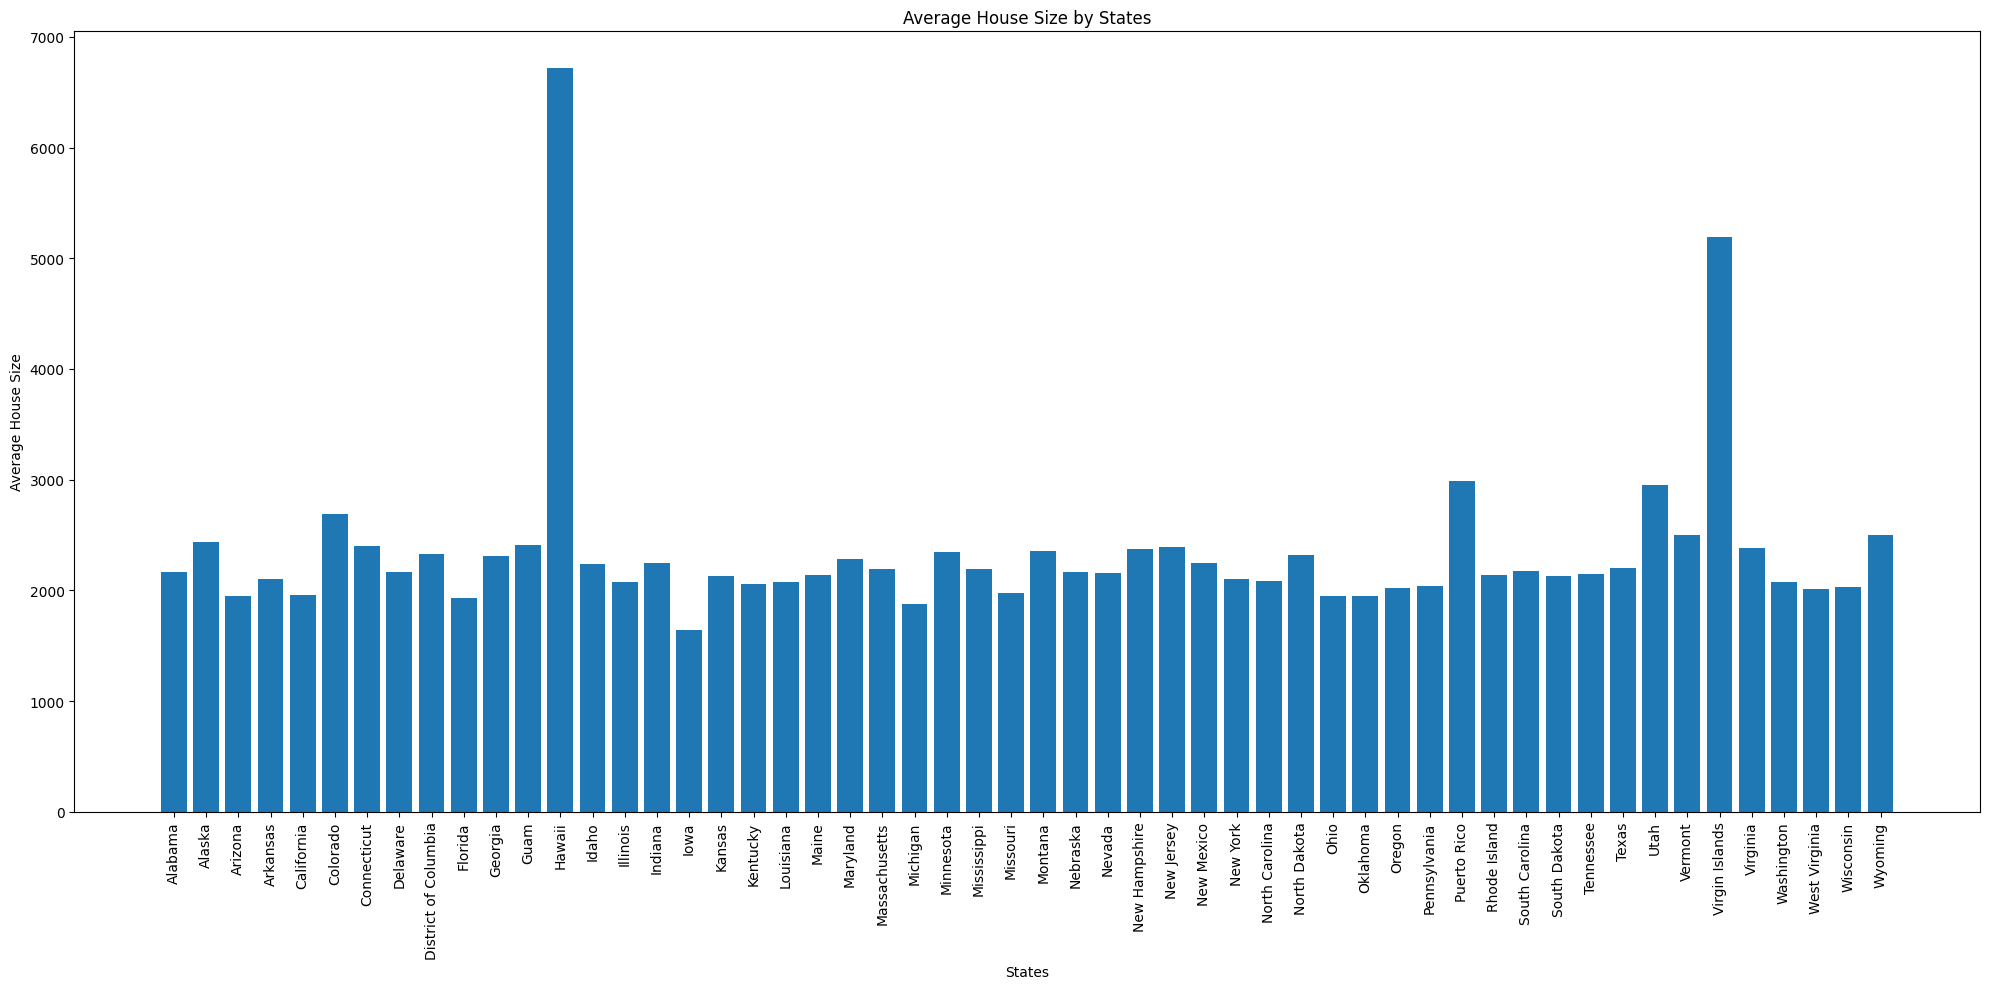

In [36]:
avg_house_size = df_visuals.groupby('state')['house_size'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.bar(avg_house_size['state'], avg_house_size['house_size'])
plt.xlabel("States")
plt.ylabel("Average House Size")
plt.title("Average House Size by States")
plt.xticks(rotation=90)

plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()

For Visualization purposes, we can see that in general all states have roughly the same average house sizes (does not mean they are all same prices). However, some states in our dataset are outliers but are seen as normal in our graph above.

## First Decision Tree Regression Model

In [37]:
from sklearn.model_selection import train_test_split

# prediction target
target_y = df.price
# Prediction columns used (we remove the target from here)
feature_X = df.drop(['price'], axis=1)

train_X, val_X, train_y, val_y = train_test_split(feature_X, target_y, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeRegressor

dtr_model1 = DecisionTreeRegressor()
dtr_model1.fit(train_X, train_y)

DecisionTreeRegressor()

In [39]:
preds1 = dtr_model1.predict(val_X)


In [40]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(val_y, preds1)
mae1 = round(mae1, 2)
print(f'Mean Absolute Error: {mae1}')

Mean Absolute Error: 225081.71


In [41]:
from sklearn.metrics import r2_score

score1 = r2_score(val_y, preds1)
score1 = round(score1, 2)*100

print(f'R-squared Score: {score1}%')

R-squared Score: 11.0%


## Pre-Processing To Improve Predictions

In [42]:
df2 = df.copy()
df2.head()

,price,bed,bath,acre_lot,street,city_encoded,state_encoded,house_size
0,105000.0,3.0,2.0,0.12,1962661.0,92,41,920.0
1,80000.0,4.0,2.0,0.08,1902874.0,92,41,1527.0
2,67000.0,2.0,1.0,0.15,1404990.0,8788,41,748.0
3,145000.0,4.0,2.0,0.10,1947675.0,14314,41,1800.0
5,179000.0,4.0,3.0,0.46,1850806.0,15871,41,2520.0


In [50]:
df2[['bed']].value_counts().head(15)
# Below 400 cuonts we remove from our dataset

bed 
3.0     623597
4.0     373213
2.0     191590
5.0     103253
6.0      26195
1.0      22864
7.0       6244
8.0       4366
9.0       1778
10.0       991
12.0       739
11.0       441
14.0       188
13.0       177
16.0       168
Name: count, dtype: int64

In [51]:
# Here we check the outliers in our dataset for which there isn't enough data to be able to predict on it
bed_outlier_df = df2[df2.groupby('bed')['bed'].transform('size')<=400]
bed_outlier_df

,price,bed,bath,acre_lot,street,city_encoded,state_encoded,house_size
368,99000.0,13.0,4.0,0.20,655097.0,18429,41,600.0
1757,75900.0,13.0,3.0,0.09,321137.0,13695,41,1609.0
2968,13995000.0,33.0,35.0,0.09,966936.0,15843,41,15000.0
3771,900000.0,24.0,9.0,0.13,1286213.0,3180,22,9999.0
3812,1500000.0,28.0,16.0,0.13,1129058.0,8094,22,9999.0
...,...,...,...,...,...,...,...,...
2203783,894996.0,15.0,6.0,0.43,1347864.0,17582,51,9339.0
2204662,2550000.0,16.0,18.0,0.91,478262.0,2325,51,10260.0
2206056,11975000.0,15.0,18.0,1.10,383232.0,1825,51,41146.0
2209186,3800000.0,19.0,15.0,0.17,517943.0,14661,51,1401.0


In [52]:
df2.shape

(1356691, 8)

In [53]:
df2 = df2.drop(bed_outlier_df.index)
df2.shape

(1355271, 8)

In [54]:
df2['bath'].value_counts()

bath
2.0      589061
3.0      385123
1.0      184171
4.0      131095
5.0       38665
6.0       14439
7.0        6084
8.0        3294
9.0        1529
10.0        797
11.0        364
12.0        303
13.0        126
14.0         86
15.0         45
16.0         24
18.0         14
17.0         11
20.0          9
19.0          6
21.0          5
25.0          3
24.0          3
32.0          3
38.0          2
113.0         2
54.0          1
23.0          1
26.0          1
29.0          1
27.0          1
36.0          1
175.0         1
Name: count, dtype: int64

In [56]:
bath_outlier_df = df2[df2.groupby('bath')['bath'].transform('size')<=350]
bath_outlier_df

,price,bed,bath,acre_lot,street,city_encoded,state_encoded,house_size
2443,16999000.0,9.0,12.0,0.47,1738904.0,15707,49,30378.0
3609,1495000.0,9.0,13.0,28.00,956920.0,7335,22,9386.0
5322,399900.0,12.0,12.0,0.30,661820.0,14146,22,6803.0
8523,14995000.0,10.0,15.0,450.95,1143002.0,3827,6,18000.0
8917,5900000.0,8.0,13.0,29.50,544884.0,10054,6,12016.0
...,...,...,...,...,...,...,...,...
2206357,3499950.0,12.0,12.0,0.28,990497.0,5690,51,11424.0
2206665,1635000.0,12.0,12.0,0.11,929596.0,5690,51,6836.0
2207677,1300000.0,10.0,12.0,0.55,1676760.0,12597,51,4776.0
2210757,2100000.0,12.0,18.0,0.17,1221870.0,17582,51,1080.0


In [57]:
df2 = df2.drop(bath_outlier_df.index)
df2.shape

(1354622, 8)

In [58]:
df2['state_encoded'].value_counts(ascending=True)

state_encoded
11       113
49       120
1        799
48      1251
31      1731
54      1752
41      1771
44      2035
20      2259
36      2384
8       2695
12      4036
28      4273
27      5074
7       6088
42      6551
52      6996
25      7342
6       9394
47      9625
29     10048
3      10735
17     11212
15     11531
13     11689
33     11815
19     14434
0      14675
18     15719
16     16495
43     17170
45     18294
53     18432
32     19447
5      19510
39     21811
23     22052
38     26820
22     27924
26     30065
24     32671
21     32905
35     37303
37     41156
50     44156
51     46336
14     46616
10     49163
34     50578
40     51842
2      54456
9     126225
46    145173
4     169875
Name: count, dtype: int64

In [69]:
state_encoded_combined = real_estate_df[['state', 'state_encoded']]
state_encoded_combined = state_encoded_combined.drop_duplicates()
state_encoded_combined = state_encoded_combined.dropna()
state_encoded_combined.sort_values(by='state_encoded')

,state,state_encoded
378038,Alabama,0
1411776,Alaska,1
1190549,Arizona,2
634252,Arkansas,3
160666,California,4
160667,Colorado,5
3899,Connecticut,6
80654,Delaware,7
210048,District of Columbia,8
303557,Florida,9


In [71]:
df_visuals2 = real_estate_df[['price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'house_size', 'state_encoded']]
len(df_visuals2['state'].value_counts().unique())

55

In [70]:
state_outlier_df = df2[df2.groupby('state_encoded')['state_encoded'].transform('size')<=1000]
state_outlier_df

,price,bed,bath,acre_lot,street,city_encoded,state_encoded,house_size
2260,175000.0,5.0,2.0,0.21,1854903.0,15758,49,1140.0
2261,100000.0,9.0,5.0,0.04,1660192.0,15758,49,3120.0
2262,1599000.0,4.0,6.0,1.04,1774773.0,15758,49,6760.0
2264,925000.0,3.0,5.0,0.81,105353.0,15758,49,4500.0
2270,950000.0,5.0,4.0,0.99,1260473.0,15758,49,5000.0
...,...,...,...,...,...,...,...,...
1414787,489000.0,4.0,2.0,0.04,1054194.0,3243,49,1812.0
1414795,979000.0,5.0,4.0,0.81,913404.0,3243,49,5000.0
1414799,799000.0,3.0,4.0,1.01,1745588.0,3243,49,2500.0
1414808,799000.0,5.0,4.0,0.65,1286017.0,3243,49,3833.0


In [72]:
df2 = df2.drop(state_outlier_df.index)
df2.shape

(1353590, 8)

In [74]:
city_outlier_df = df2[df2.groupby('city_encoded')['city_encoded'].transform('size')<=180]
city_outlier_df

,price,bed,bath,acre_lot,street,city_encoded,state_encoded,house_size
0,105000.0,3.0,2.0,0.12,1962661.0,92,41,920.0
1,80000.0,4.0,2.0,0.08,1902874.0,92,41,1527.0
2,67000.0,2.0,1.0,0.15,1404990.0,8788,41,748.0
3,145000.0,4.0,2.0,0.10,1947675.0,14314,41,1800.0
5,179000.0,4.0,3.0,0.46,1850806.0,15871,41,2520.0
...,...,...,...,...,...,...,...,...
2226348,249000.0,5.0,4.0,0.25,649947.0,3588,51,3040.0
2226351,578500.0,3.0,3.0,5.00,1683540.0,7801,39,1967.0
2226353,280000.0,3.0,2.0,0.34,209038.0,11466,39,1274.0
2226354,215000.0,2.0,2.0,0.12,663098.0,11466,39,1524.0


In [75]:
df2 = df2.drop(city_outlier_df.index)
df2.shape

(961638, 8)

In [76]:
df2.duplicated().sum()

67612

In [77]:
df2 = df2.drop_duplicates()
df2.shape

(894026, 8)

In [78]:
# Shuffling dataset
df2 = df2.sample(frac=1)

## Decision Tree Regression After Pre-processing

In [79]:
# prediction target with new data
target_y2 = df2['price']
# Prediction columns used with new data
feature_X2 = df2.drop(['price'], axis=1)

train_X2, val_X2, train_y2, val_y2 = train_test_split(feature_X2, target_y2, test_size=0.2, random_state=42)

In [80]:
dtr_model2 = DecisionTreeRegressor()
dtr_model2.fit(train_X2, train_y2)

DecisionTreeRegressor()

In [81]:
preds2 = dtr_model2.predict(val_X2)

In [82]:
mae2 = mean_absolute_error(val_y2, preds2)
mae2 = round(mae2, 2)
print(f'Mean Absolute Error: {mae2}')

Mean Absolute Error: 206339.09


In [83]:
score2 = r2_score(val_y2, preds2)
score2 = round(score2, 2)*100

print(f'R-squared Score: {score2}%')

R-squared Score: 23.0%


## Linear regression Model

In [84]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(train_X2, train_y2)

LinearRegression()

In [85]:
linreg_preds = linreg_model.predict(val_X2)

In [86]:
linreg_score = mean_absolute_error(val_y2, linreg_preds)
linreg_score

338522.64575035457

## Gradient Boosting regression

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(train_X2, train_y2)

GradientBoostingRegressor()

In [88]:
gbr_preds = gbr_model.predict(val_X2)

In [89]:
gbr_mae = mean_absolute_error(val_y2, gbr_preds)
gbr_mae

231284.7256648595

In [90]:
gbr_model.score(val_X2, val_y2)

0.43734770519975474

In [91]:
linreg_model.score(val_X2, val_y2)

0.18910167165035163

In [92]:
dtr_model2.score(val_X2, val_y2)

0.2274917358961771

## Find the best amount of Leaf Nodes for optimized results

In [93]:
def get_mae_dtr(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae_dtr = mean_absolute_error(val_y, preds_val)
    score_dtr = r2_score(val_y, preds_val)
    
    print(f"Max leaf nodes: {max_leaf_nodes} | MAE: {mae_dtr} | R-score: {score_dtr}")

In [95]:
for max_leaf_nodes in [10000, 15000, 25000, 40000, 45000]:
    get_mae_dtr(max_leaf_nodes, train_X2, val_X2, train_y2, val_y2)

Max leaf nodes: 10000 | MAE: 199267.82254754542 | R-score: 0.2180425175552111
Max leaf nodes: 15000 | MAE: 196826.07526230445 | R-score: 0.21410719237856923
Max leaf nodes: 25000 | MAE: 195071.1798812966 | R-score: 0.20795141744333911
Max leaf nodes: 40000 | MAE: 195218.03910240624 | R-score: 0.20246608744476657
Max leaf nodes: 45000 | MAE: 195123.38290691152 | R-score: 0.2019085667971181


In [96]:
def get_mae_gbr(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = GradientBoostingRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(train_X, train_y)
    preds_val_gbr = model.predict(val_X)
    mae_gbr = mean_absolute_error(val_y, preds_val_gbr)
    score_gbr = r2_score(val_y, preds_val_gbr)
    
    print(f"Max leaf nodes: {max_leaf_nodes} | MAE: {mae_gbr} | R-score: {score_gbr}")

In [97]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    get_mae_gbr(max_leaf_nodes, train_X2, val_X2, train_y2, val_y2)

Max leaf nodes: 5 | MAE: 236191.24000323506 | R-score: 0.42943126761082606
Max leaf nodes: 50 | MAE: 231249.07905850775 | R-score: 0.43736245182531186
Max leaf nodes: 500 | MAE: 231249.07905850775 | R-score: 0.43736245182531186
Max leaf nodes: 5000 | MAE: 231249.07905850775 | R-score: 0.43736245182531186


In [99]:
dtr_model_final = DecisionTreeRegressor(max_leaf_nodes=25000, random_state=42)
dtr_model_final.fit(train_X2, train_y2)

DecisionTreeRegressor(max_leaf_nodes=25000, random_state=42)

In [100]:
preds_final = dtr_model_final.predict(val_X2)


In [101]:
mae_final = mean_absolute_error(val_y2, preds_final)
mae_final = round(mae_final, 2)
print(f'Mean Absolute Error: {mae_final}')

Mean Absolute Error: 195071.18


## Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(random_state=1)
rfr_model.fit(train_X2, train_y2)

RandomForestRegressor(random_state=1)

In [103]:
rfr_preds = rfr_model.predict(val_X2)

In [104]:
mae_rfr = mean_absolute_error(val_y2, rfr_preds)
mae_rfr = round(mae_rfr, 2)
print(f'Mean Absolute Error: {mae_rfr}')

Mean Absolute Error: 158388.46


In [105]:
r2_score(val_y2, rfr_preds)

0.5466018792128511

------------------------------------------------------------------------------------------------------------------------------------------------------------

Measuring the MAE is more suitable for our target. After testing the Decision Tree Regressor, Gradient Boost Regressor, Linear regression, and Random Forest Regressor it is clear that the MAE is lowest with the Random Forest and so is the R squared score accuracy.

------------------------------------------------------------------------------------------------------------------------------------------------------------